# **Regresión Lineal**
**Nombre:** Juan Manuel Gutiérrez Gómez  **Código:** 2260563

La regresión lineal es una técnica de modelado estadístico que se emplea para describir una variable de respuesta continua como una función de una o varias variables predictoras. Es uno de los modelos más polulares, pues son muy fáciles de interpretar. 

Estos modelos son muy concidos en su forma simple de regresión lineal, pero pueden ser aplicados a sistemas complejos para comprender y predecir ciertos comportamientos de un sistema.

En el siguiente Notebook se explicarán algunos de los modelos de regresión lineal, desde el más fácil has el más complejo, usando python y algunas de las librerias más potentes del área de las matemáticas, estádistica y el análisis de datos.

Primero importamos las librerias principales que usaremos:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

### **Regresión Lineal Simple**

Este es el modelo de regresión lineal más conocido, y también el fácil y usado. Estos modelos que utilizan un único predictor. La ecuación general es: 
### $$y = ax + b$$

Considere los siguientes datos, que están dispersos alrededor de una línea con una pendiente de 2 y una intersección de -5:

En el bloque de codigo que ve a continuación, primero se declara la variable **rng** que usa el método random de Numpy RandomState, este expone una serie de métodos para generar números aleatorios extraídos de una variedad de distribuciones de probabilidad. Luego se declara **x** y se inicializa usando **rng** para generar los valores aleatorios de **x** uniformemente distribuidos, después se declara **y** que va a ser la ecuación de la forma $y = ax + b$ y finalmente usamos libreria de graficación  matplotlib.pyplot para mostrar la gráfica que nos genera la ecuación:

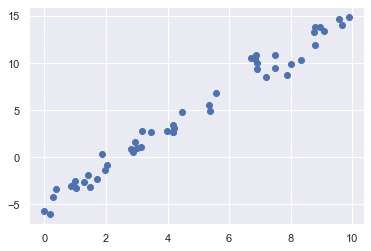

In [3]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

En este caso es lo mismo, la diferencia es que ahora usamos LinearRegression de la libreria de MachineLearning sklearn para ajustar los datos y construir la línea de mejor ajuste.

LinearRegression ajusta un modelo lieal común para minimizar la suma residual de cuadrados entre los objetivos observados en el conjunto de datos y los objetivos predichos por la aproximación lineal:

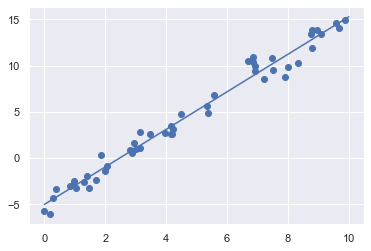

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Aquí imprimimos la pendiente del modelo y la intersección del modelo con los parámetro ya predefinidos por sklearn:

In [5]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


Los resultados son muy cercanos a lo esperado porque se acercan a lo que nos muestra la gráfica.

Por otro lado también se puede ir más allá de un modelo bidimensional a un modelo multidimensional de la forma $y = a_{0} + a_{1}x_{1} + a_{2}x_{2} + \cdots$ Evidentemente estas regresiones son más difíciles de visualizar, pero con la ayuda de Numpy se pueden generar datos de ejemplo usando el producto punto (dot product) de matrices:

In [6]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.500000000000006
[ 1.5 -2.   1. ]


Aquí, los datos **y** se construyen a partir de tres valores aleatorios de **x**, y la regresión lineal recupera los coeficientes utilizados para construir los datos.
De esta forma se usa **LinearRegression** para ajustar líneas, planos o hiperplanos a nuestros datos.

### Regresión de función base

Un truco que puede usar para adaptar la regresión lineal a relaciones no lineales entre variables es transformar los datos de acuerdo con funciones básicas.

#### Funciones de base polinomial

Las funciones de base polinomial son los suficientemente útiles como para ser incluidas en **sklearn** por lo que las usaremos con **PolynomialFeatures** 

Básicamente aquí llamamos a x para definir un arreglo de **Numpy** para luego ser preprocesado por el método **PolynomialFeatures()** y luego generar el ajustar los datos y luego transformalos usando **fit_transform()**.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Vemos aquí que el transformador ha convertido nuestro arreglo unidimensional en un arreglo tridimensional tomando el exponente de cada valor. Esta nueva representación de datos de mayor dimensión se puede conectar a una regresión lineal.

La forma más óptima de lograr esto es usando una canalización, para esto usaremos make_pipeline de sklearn.pipeline. Hagamos un modelo polinomial de séptimo grado de esta manera:

In [8]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

Con la transformación hecha, podemos usar el modelo lineal para ajustar relaciones mucho más complicadas entre **x** e **y**. Por ejemplo, aquí hay una onda sinusoidal con ruido:

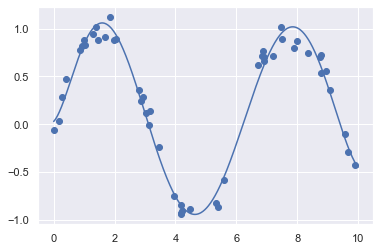

In [9]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Asi es como podemos adaptar una regresión lineal a relaciones no lienales usando funciones de base polinómica de séptimo orden.

#### Funciones de base gaussiana

Por supuesto, son posibles otras funciones básicas. Por ejemplo, un patrón útil es ajustar un modelo que no sea una suma de bases polinómicas, sino una suma de bases gaussianas.

Las funciones de base gaussiana no están integradas en **sklearn**, por lo que en el siguiente bloque de código se define una clase que transforma los datos de una regresión lineal de a cuerdo a funciones de base gaussiana.

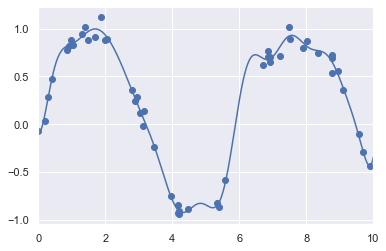

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Características gaussianas uniformemente espaciadas para entrada unidimensional"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None): #Base Gaussiana
        arg = (x - y) / width         
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # crea N centros repartidos a lo largo del rango de datos
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

**Las funciones Gaussinas tienen múltiples aplicaiones en la química por lo que pueden usarsen para predecir comportamientos de los materiales, un ejemplo pueden ser los orbitales moleculares usados en química computacional que son combinaciones lineales de funciones gaussianas llamados orbitales gaussianos.**

### Regularización 

La introducción de funciones básicas en nuestra regresión lineal hace que el modelo sea mucho más flexible, pero también puede conducir rápidamente a un ajuste excesivo. Por ejemplo, si elegimos demasiadas funciones de base gaussiana, obtenemos resultados que no se ven tan bien:

Aquí volvemos a generar el modelo de regresión, solo que esta vez con un estimador base de 30 dimensiones en lugar de 20.

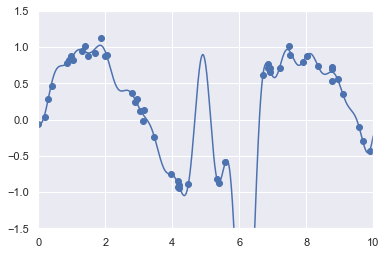

In [11]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

Con los datos proyectados a la base de 30 dimensiones, el modelo tiene demasiada flexibilidad y llega a valores extremos entre ubicaciones donde está limitado por los datos. 

Podemos ver la razón de esto si graficamos los coeficientes de las bases gaussianas con respecto a sus ubicaciones:

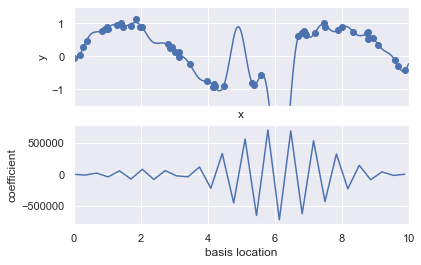

In [12]:
def basis_plot(model, title=None):                       #Definimos la función que graficará los coeficientes de las bases
    fig, ax = plt.subplots(2, sharex=True)               #definimos fig, que son las figuras y ax que son los ejes, en este caso
                                                         #serán dos figuras que comparten el eje X.
    model.fit(x[:, np.newaxis], y)                       #Ajustamos los datos del modelo en el primer grafico
    ax[0].scatter(x, y)                                  #Con scatter() se usa para trazar una dispersión de y frente a x.
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis])) #Establecemos los parámetros del gráfico
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))  #Setteamos los ejes
    
    if title:                                            #si existe título, que se asigne al grafico 1
        ax[0].set_title(title)                           #Seteamos los títulos de os graficos

    ax[1].plot(model.steps[0][1].centers_,               #Aquí es lo mismo pero para el graficon 2
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())  #Generamos la canalización del modelo
basis_plot(model)                                                #usamos la función de graficación de coeficientes de las bases

El panel inferior de esta figura muestra la amplitud de la función base en cada ubicación. Este es un comportamiento típico de sobreajuste cuando las funciones de base se superponen: los coeficientes de las funciones de base adyacentes explotan y se anulan entre sí. Sabemos que tal comportamiento es problemático, y sería bueno si pudiéramos limitar dichos picos explícitamente en el modelo al penalizar los valores grandes de los parámetros del modelo. Tal sanción se conoce como regularización y se presenta de varias formas.

#### Regresión de Cresta ($L_{2}$ regularización) 

Quizás la forma más común de regularización se conoce como regresión de cresta o $L_{2}$ regularización , a veces también llamada regularización de Tikhonov. Esto procede penalizando la suma de cuadrados (2-normas) de los coeficientes del modelo.

A continuación impoertamos **Ridge** de sklearn.linear_model para graficar la regresión de cresta usando la función que explicamos en el bloque anterior:

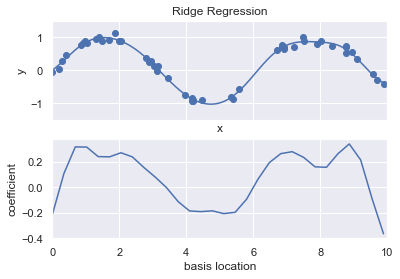

In [13]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

#### Regresión de Lazo ($L_{1}$ regularización) 

Otro tipo de regularización muy común se conoce como lazo e implica penalizar la suma de valores absolutos (1-normas) de los coeficientes de regresión.

Aunque esto es conceptualmente muy similar a la regresión de cresta, los resultados pueden diferir sorprendentemente: por ejemplo, debido a razones geométricas, la regresión de lazo tiende a favorecer los modelos dispersos cuando es posible: es decir, preferentemente establece los coeficientes del modelo exactamente en cero.

C:\Users\JuanMa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


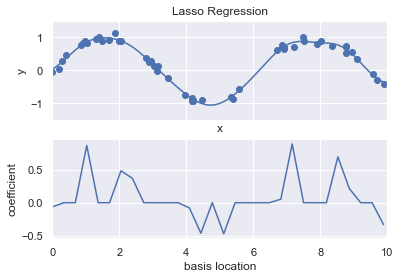

In [14]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

## Ejemplo: Predicción del Tráfico de Bicicletas

Como ejemplo, echemos un vistazo a si podemos predecir la cantidad de viajes en bicicleta a través del puente Fremont de Seattle según el clima, la estación y otros factores. Ya hemos visto estos datos en Trabajar con series de tiempo .

En esta sección, uniremos los datos de bicicletas con otro conjunto de datos e intentaremos determinar en qué medida los factores climáticos y estacionales (temperatura, precipitación y horas de luz) afectan el volumen del tráfico de bicicletas a través de este corredor. Afortunadamente, la NOAA pone a disposición sus datos diarios de la estación meteorológica (utilicé el ID de la estación USW00024233) y podemos usar Pandas fácilmente para unir las dos fuentes de datos. Realizaremos una regresión lineal simple para relacionar el clima y otra información con el conteo de bicicletas, para estimar cómo un cambio en cualquiera de estos parámetros afecta la cantidad de ciclistas en un día determinado.

Primero y lo más importante es cargar los datos que usaremos: la cunenta de las bicicletas que pasan por FremontBridge y el los datos del clima de la zona más cercana al puente.

In [15]:
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)    #datos de las bicicletas
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)  #Datos del clima

A continuación, calcularemos el tráfico total diario de bicicletas y lo colocaremos en su propio marco de datos:

In [16]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

Vimos anteriormente que los patrones de uso generalmente varían de un día a otro; tomemos en cuenta esto en nuestros datos agregando columnas binarias que indiquen el día de la semana:

In [17]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

De manera similar, podríamos esperar que los pasajeros se comporten de manera diferente durante las vacaciones; agreguemos un indicador de esto también importando USFederalHolidayCalendar de pandas.tseries.holiday, **USFederalHolidayCalendar** es el calendario de vacaciones oficial de Estados Unidos.

In [18]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()                                 #Usamos la data almacenandola en una variable 'cal' calendar
holidays = cal.holidays('2012', '2016')                          #Se toman como referencia las vaciones de los años 2012 y 2016
daily = daily.join(pd.Series(1, index=holidays, name='holiday')) #Se unen los datos de las vacaciones de estos dos años
daily['holiday'].fillna(0, inplace=True)                         #completa los valores faltantes con un true

Las horas de luz no siempre son las mismas en todos los día, esto podría afectar el tráfico de bicicletas en la zona; usemos el cálculo astronómico estándar para agregar esta información:

(8.0, 17.0)

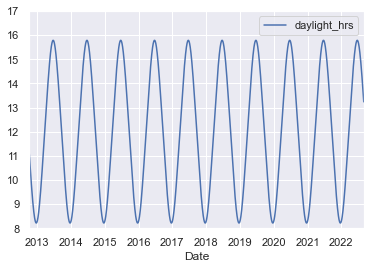

In [19]:
from datetime import datetime as dt
def hours_of_daylight(date, axis=23.44, latitude=47.61):                 #Declaramos una función para graficar los datos
    """Compute the hours of daylight for the given date"""
    days = (date - dt(2000, 12, 21)).days                                #Desde el año 2000
    m = (1. - np.tan(np.radians(latitude))                               #La siguiente operación calcula las horas de luz
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25))) 
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.     #retorna las horas totales de luz en las 24 horas del día

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

También podemos agregar la temperatura promedio y la precipitación total a los datos. Además de las pulgadas de precipitación, agreguemos una bandera que indique si un día está seco (tiene cero precipitaciones):

In [20]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

El siguiente es un contador que aumentará de día en día y calculará los años que han pasado.Esto nos permitirá medir cualquier aumento o disminución anual observado en los cruces diarios:

In [21]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [22]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,NaN,NaN,NaN,0.000000
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,NaN,NaN,NaN,0.002740
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,NaN,NaN,NaN,0.005479
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,NaN,NaN,NaN,0.008219
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,NaN,NaN,NaN,0.010959


Con esto, podemos elegir las columnas a usar y ajustar un modelo de regresión lineal a nuestros datos. Estableceremos fit_intercept = False, porque las banderas diarias esencialmente funcionan como sus propias intersecciones específicas del día:

In [23]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

Finalmente, podemos comparar visualmente el tráfico de bicicletas total y pronosticado:

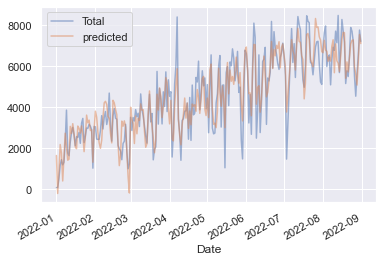

In [24]:
daily[['Total', 'predicted']].plot(alpha=0.5);

Es evidente que nos hemos perdido algunas características clave, especialmente durante el verano. Nuestras funciones no están completas (es decir, las personas deciden si ir en bicicleta al trabajo basándose en algo más que esto) o hay algunas relaciones no lineales que no hemos tenido en cuenta (p. ej., tal vez las personas viajan menos a temperaturas altas y bajas). ). Sin embargo, nuestra aproximación aproximada es suficiente para darnos algunas ideas, y podemos echar un vistazo a los coeficientes del modelo lineal para estimar cuánto contribuye cada característica al recuento diario de bicicletas:

In [25]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon            -2.051335e+00
Tue             9.003081e+02
Wed             7.605765e+02
Thu             6.789324e+02
Fri             8.051731e+01
Sat            -6.230224e+01
Sun            -7.002306e+02
holiday        -2.164597e-09
daylight_hrs    2.580538e+02
PRCP           -2.759617e+05
dry day         1.055180e+03
Temp (C)        8.181428e+02
annual         -4.100279e+02
dtype: float64

Estos números son difíciles de interpretar sin alguna medida de su incertidumbre. Podemos calcular estas incertidumbres rápidamente utilizando remuestreos de arranque de los datos:

In [26]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

Con estos errores estimados, veamos nuevamente los resultados:

In [27]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

                effect    error
Mon               -2.0   8807.0
Tue              900.0   8790.0
Wed              761.0   8794.0
Thu              679.0   8812.0
Fri               81.0   8805.0
Sat              -62.0   8788.0
Sun             -700.0   8803.0
holiday           -0.0      0.0
daylight_hrs     258.0     44.0
PRCP         -275962.0  98340.0
dry day         1055.0    134.0
Temp (C)         818.0    129.0
annual          -410.0   1022.0


Primero vemos que hay una tendencia relativamente estable en la línea de base semanal: hay muchos más ciclistas entre semana que los fines de semana y días festivos. Vemos que por cada hora adicional de luz diurna, 129 ± 9 personas más eligen viajar; un aumento de temperatura de un grado centígrado anima a 65 ± 4 personas a agarrar su bicicleta; un día seco significa un promedio de 548 ± 33 ciclistas más, y cada pulgada de precipitación significa que 665 ± 62 personas más dejan su bicicleta en casa. Una vez que se toman en cuenta todos estos efectos, vemos un modesto aumento de 27 ± 18 nuevos pasajeros diarios cada año.

Es casi seguro que a nuestro modelo le falta alguna información relevante. Por ejemplo, los efectos no lineales (como los efectos de la precipitación y la temperatura fría) y las tendencias no lineales dentro de cada variable (como la falta de inclinación a montar en bicicleta a temperaturas muy frías y muy calientes) no se pueden tener en cuenta en este modelo. Además, hemos descartado parte de la información más detallada (como la diferencia entre una mañana lluviosa y una tarde lluviosa) y hemos ignorado las correlaciones entre días (como el posible efecto de un martes lluvioso en los números del miércoles, o el efecto de un día soleado inesperado después de una racha de días lluviosos). ¡Todos estos son efectos potencialmente interesantes, y ahora tiene las herramientas para comenzar a explorarlos si lo desea!

## Conclusión General

En conclusión, los modelos de regresión lineal son importantes para la prediccion e interpretación de sucesos dentro de un sistema determinado. Estos modelos pueden ser simples y aplicados a sistemas pequeños o pueden ser complejos y pueden ser utilizados para tratamiento de datos masivos y predicciones de sistemas complejos como los del clima, la astronomía, la química, la física, estadística, las ciencias sociales y hasta todo tipo de area del conocimiento que involucre datos.